In [66]:
import sympy as sp
from sympy.plotting import plot

In [21]:
N = 6
t = sp.symbols('t', real= True)
m = sp.symbols('m', real=True)
k = sp.symbols('k', real=True)
a = sp.symbols('a', real=True)
c = sp.symbols('c:'+str(N+2), real=True)
omega = sp.symbols('omega', real=True)
x = sp.symbols('x0:'+str(N+2), cls=sp.Function)

In [12]:
T = m / 2 * sum(x[k](t).diff(t)**2 for k in range(1, N+1))
V = (k / 2 * sum(x[k](t)**2 for k in range(1, N+1)) + 
     a * sum((x[k+1](t)-x[k](t))**2 for k in range(1, N+1)))

In [14]:
V = V.subs({x[0](t): x[N](t),
            x[N+1](t): x[1](t)})

In [16]:
L = T - V

In [17]:
def euler_lagrange(L, i):
    p = L.diff(x[i](t).diff(t))
    return sp.Eq(p.diff(t), L.diff(x[i](t))).simplify()

eqs = [euler_lagrange(L, i) for i in range(1, N+1)]

In [85]:
lhs = sp.Matrix([e.lhs for e in eqs])
rhs = sp.Matrix([e.rhs for e in eqs])
eq = sp.Eq(lhs, rhs)

In [86]:
ansatz = {x[k](t): c[k] * sp.exp(sp.I * omega * t) for k in range(1, N+1)}

In [87]:
eq = eq.subs(ansatz).doit().simplify()

In [88]:
eq = sp.Eq(-eq.lhs * sp.exp(-sp.I*omega*t), -eq.rhs * sp.exp(-sp.I*omega*t)).simplify()

In [90]:
def to_matrix(exprs, coeffs):
    A = sp.Matrix(sp.zeros(len(exprs)))
    for irow, e in enumerate(exprs):
        e = e.expand().collect(coeffs)
        for icol, c in enumerate(coeffs):
            A[irow, icol] = e.coeff(c)
    
    return A

In [91]:
K = to_matrix(eq.rhs, [c[k] for k in range(1, N+1)])
M = to_matrix(eq.lhs, [c[k] for k in range(1, N+1)])

In [93]:
M

Matrix([
[m*omega**2,          0,          0,          0,          0,          0],
[         0, m*omega**2,          0,          0,          0,          0],
[         0,          0, m*omega**2,          0,          0,          0],
[         0,          0,          0, m*omega**2,          0,          0],
[         0,          0,          0,          0, m*omega**2,          0],
[         0,          0,          0,          0,          0, m*omega**2]])

In [94]:
x_eigenvecs = []
x_eigenvals = []

for ev, mult, vecs in K.eigenvects():
    x_eigenvecs.extend(vecs)
    x_eigenvals.extend([ev] * mult)

In [96]:
b = sp.symbols('b:'+str(N+1))

modes = [b[k+1] * x_eigenvecs[k] * sp.exp(sp.I*sp.sqrt(x_eigenvals[k]/m)*t) for k in range(N)]
sol = modes[0]

for mode in modes[1:]:
    sol = sol + mode

In [117]:
paras = {k: 1, m: 1, a: 1}

In [135]:
initial = sp.Matrix(sp.zeros(N, 1))
initial[0] = 1


In [136]:
sol_coeff = sp.solve(sp.Eq(sol.subs(t, 0), initial))
sol_concrete = sol.subs(sol_coeff)

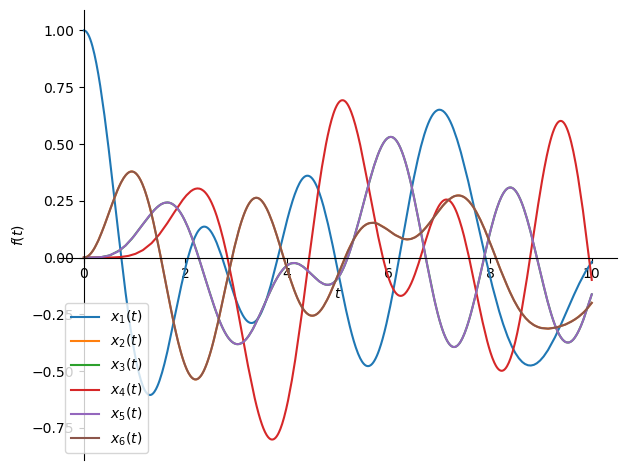

In [143]:
tmax = 10

pl = plot(sp.re(sol_concrete.subs(paras)[0]), (t, 0, tmax),
          show=False, label='$x_1(t)$', legend=True)

for i in range(1, N):
    pl2 = plot(sp.re(sol_concrete.subs(paras)[i]), (t, 0, tmax),
          show=False, label=f'$x_{i+1}(t)$', legend=True)
    pl.extend(pl2)

pl.show()
